### Using Diamonds Dataset - PRE-PROCESSING

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import optuna
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [171]:
df = pd.read_csv("diamond.csv")

In [172]:
print("Dataset shape",df.shape)

Dataset shape (53940, 13)


In [173]:
df.head(5)

Unnamed: 0 carat      cut color clarity  average us salary  \
0          1  0.23    Ideal     E     SI2              31282   
1          2  0.21  Premium     E     SI1              40049   
2          3  0.23     Good     E     VS1              33517   
3          4  0.29  Premium     I     VS2              38495   
4          5  0.31     Good     J     SI2              34178   

   number of diamonds mined (millions) depth table price     x     y     z  
0                                 5.01  61.5    55   326  3.95  3.98  2.43  
1                                 1.69  59.8    61   326  3.89  3.84  2.31  
2                                 3.85  56.9    65   327  4.05  4.07  2.31  
3                                 3.49  62.4    58   334   4.2  4.23  2.63  
4                                 4.70  63.3    58   335  4.34  4.35  2.75

In [174]:
df.describe()

average us salary  number of diamonds mined (millions)
count       53940.000000                         53940.000000
mean        39521.990100                             2.902669
std          5486.892971                             1.325985
min         30000.000000                             0.600000
25%         34780.000000                             1.750000
50%         39547.500000                             2.910000
75%         44252.000000                             4.050000
max         48999.000000                             5.200000

In [175]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           53563 non-null  object 
 1   carat                                52430 non-null  object 
 2   cut                                  52647 non-null  object 
 3   color                                52428 non-null  object 
 4   clarity                              53587 non-null  object 
 5   average us salary                    53940 non-null  int64  
 6   number of diamonds mined (millions)  53940 non-null  float64
 7   depth                                53246 non-null  object 
 8   table                                52398 non-null  object 
 9   price                                52357 non-null  object 
 10  x                                    52414 non-null  object 
 11  y                           

In [176]:
print("Categorical Columns - ",df.select_dtypes(include=['object']).columns)

Categorical Columns -  Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


In [177]:
print("Numerical Columns-",df.select_dtypes(include=['int64','float64']).columns)

Numerical Columns- Index(['average us salary', 'number of diamonds mined (millions)'], dtype='object')


In [178]:
cat = len(df.select_dtypes(include=['object']).columns)
num = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features:', cat+num," = ",cat, 'categorical', '+',
      num, 'numerical')

Total Features: 13  =  11 categorical + 2 numerical


In [179]:
print("Null Values in each column")
print(df.isnull().sum())  

Null Values in each column
Unnamed: 0                              377
carat                                  1510
cut                                    1293
color                                  1512
clarity                                 353
average us salary                         0
number of diamonds mined (millions)       0
depth                                   694
table                                  1542
price                                  1583
x                                      1526
y                                      1221
z                                      1433
dtype: int64


In [180]:
# dropping irrelevant column
df = df.drop(columns=['Unnamed: 0','average us salary'],axis=1)

In [181]:
print("Unique values in each column- \n",df.nunique())

Unique values in each column- 
 carat                                    276
cut                                       18
color                                     17
clarity                                   18
number of diamonds mined (millions)      461
depth                                    187
table                                    127
price                                  11443
x                                        556
y                                        552
z                                        378
dtype: int64


In [182]:
# replacing null values with mode
for i in df.select_dtypes(include=['object']).columns:
    mode_value = df[i].mode()[0]
    df[i].fillna(mode_value,inplace=True)
print(df.isnull().sum())  

carat                                  0
cut                                    0
color                                  0
clarity                                0
number of diamonds mined (millions)    0
depth                                  0
table                                  0
price                                  0
x                                      0
y                                      0
z                                      0
dtype: int64


In [183]:
print("String values in Numeric data type:")
for c in df.select_dtypes(include=['object']):
    stringValues = df[c].str.isalpha()
    print(c,"-",stringValues.sum())

String values in Numeric data type:


carat - 1357
cut - 42478
color - 53940
clarity - 3119
depth - 1380
table - 1368
price - 2096
x - 2913
y - 511
z - 975


In [184]:
# checking for alhpabets in below columns as they are numerical in nature
for c in ["carat","depth","table","price","x","y","z"]:
    numValues = pd.to_numeric(df[c],errors="coerce")
    mean = numValues.mean()
    df[c]=df[c].apply(lambda x: mean if pd.isna(pd.to_numeric(x,errors="coerce")) else x)
    df[c] = pd.to_numeric(df[c], errors='coerce')

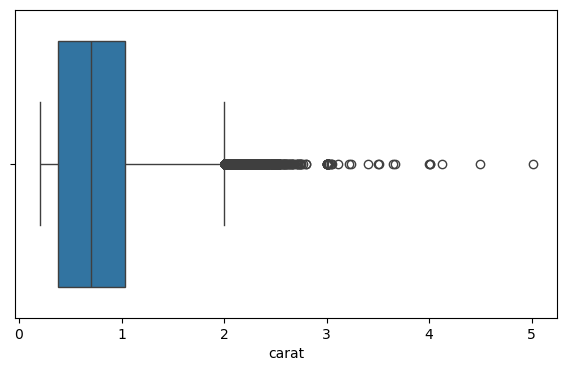

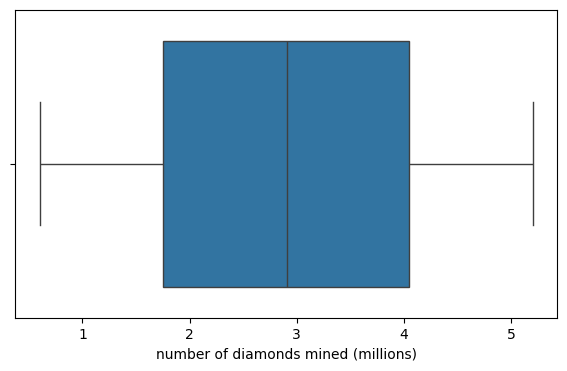

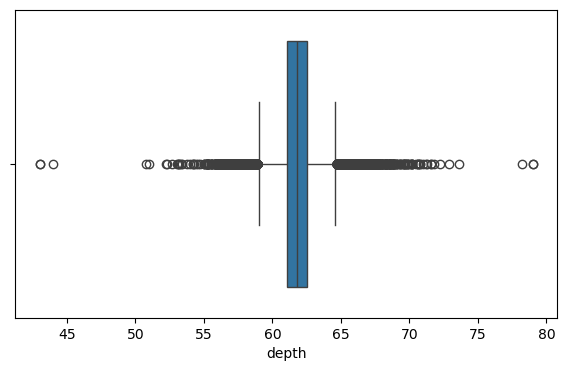

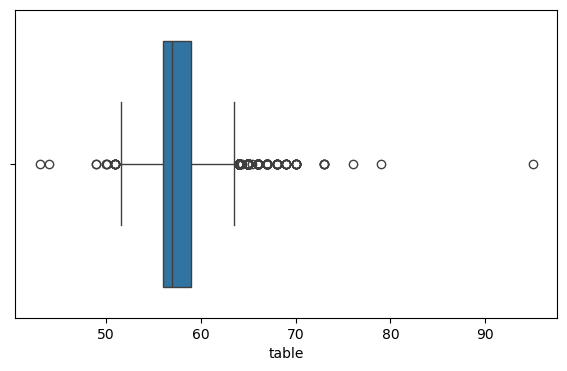

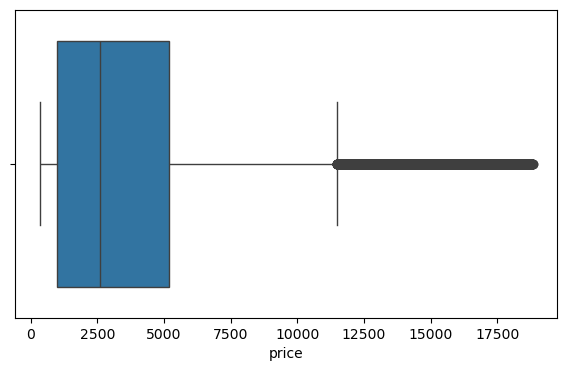

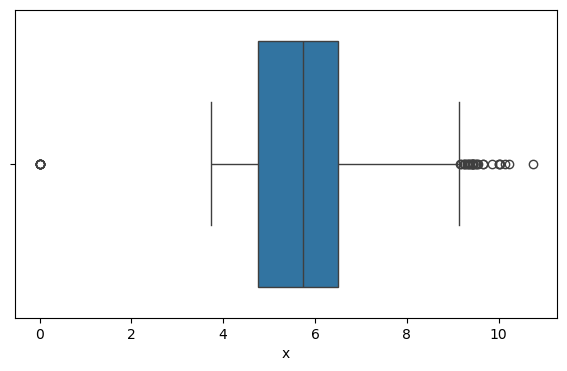

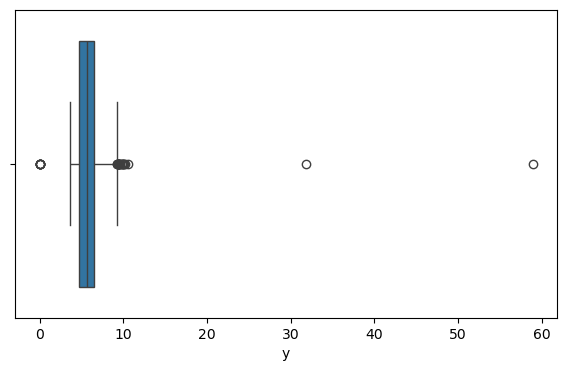

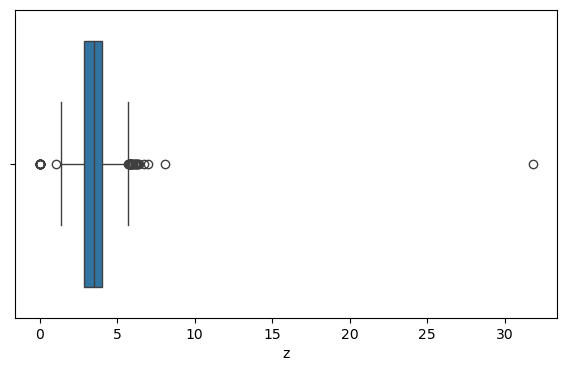

In [185]:
# plotting graph to understand the data and check for outliers
for c in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df[c])  
    plt.show()

In [186]:
# Using IQR to remove outliers
for c in df.select_dtypes(include=['int64','float64']).columns:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1

    lb = Q1 - 1.5 * IQR
    up = Q3 + 1.5 * IQR


    outliers = df[(df[c] < lb) | (df[c] > up)]

    print(f"{c:10} : {len(outliers):1}")
    
    # removing outliers 
    df = df[(df[c] >= lb) & (df[c] <= up)]


    


carat      : 1779
number of diamonds mined (millions) : 0
depth      : 2692
table      : 324
price      : 2612
x          : 5
y          : 1
z          : 7


In [188]:
# renaming all string values to lower to make all case sensitive 
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.lower()
    print(c,df[c].unique())


cut ['ideal' 'premium' 'good' 'very good' 'fair' 'maybe' 'false' 'true']
color ['e' 'i' 'j' 'h' 'f' 'g' 'd' 'maybe' 'true' 'false']
clarity ['si2' 'si1' 'vs2' 'vvs2' 'vvs1' 'vs1' 'i1' 'maybe' 'false' 'if' 'true']


In [189]:
for c in df.select_dtypes(include=['object']).columns:
    print(df[c].value_counts())

cut
ideal        20188
premium      11126
very good    10171
good          3503
maybe          447
false          438
true           371
fair           276
Name: count, dtype: int64
color
g        10717
e         8229
f         7823
h         6613
d         5697
i         4112
j         2089
maybe      425
false      410
true       405
Name: count, dtype: int64
clarity
si1      11217
vs2      10344
si2       7019
vs1       7008
vvs2      4395
vvs1      3258
if        1562
i1         464
false      432
maybe      416
true       405
Name: count, dtype: int64


In [190]:
# removing maybe , false , true
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c][~df[c].isin(["maybe", "false", "true","if"])]

df = df.reset_index(drop=True)
df = df.dropna()

In [191]:
# implementing encoding for categorical values
for col in df.select_dtypes(include=['object']).columns:
    df = pd.get_dummies(df, columns=[col],dtype=float) 

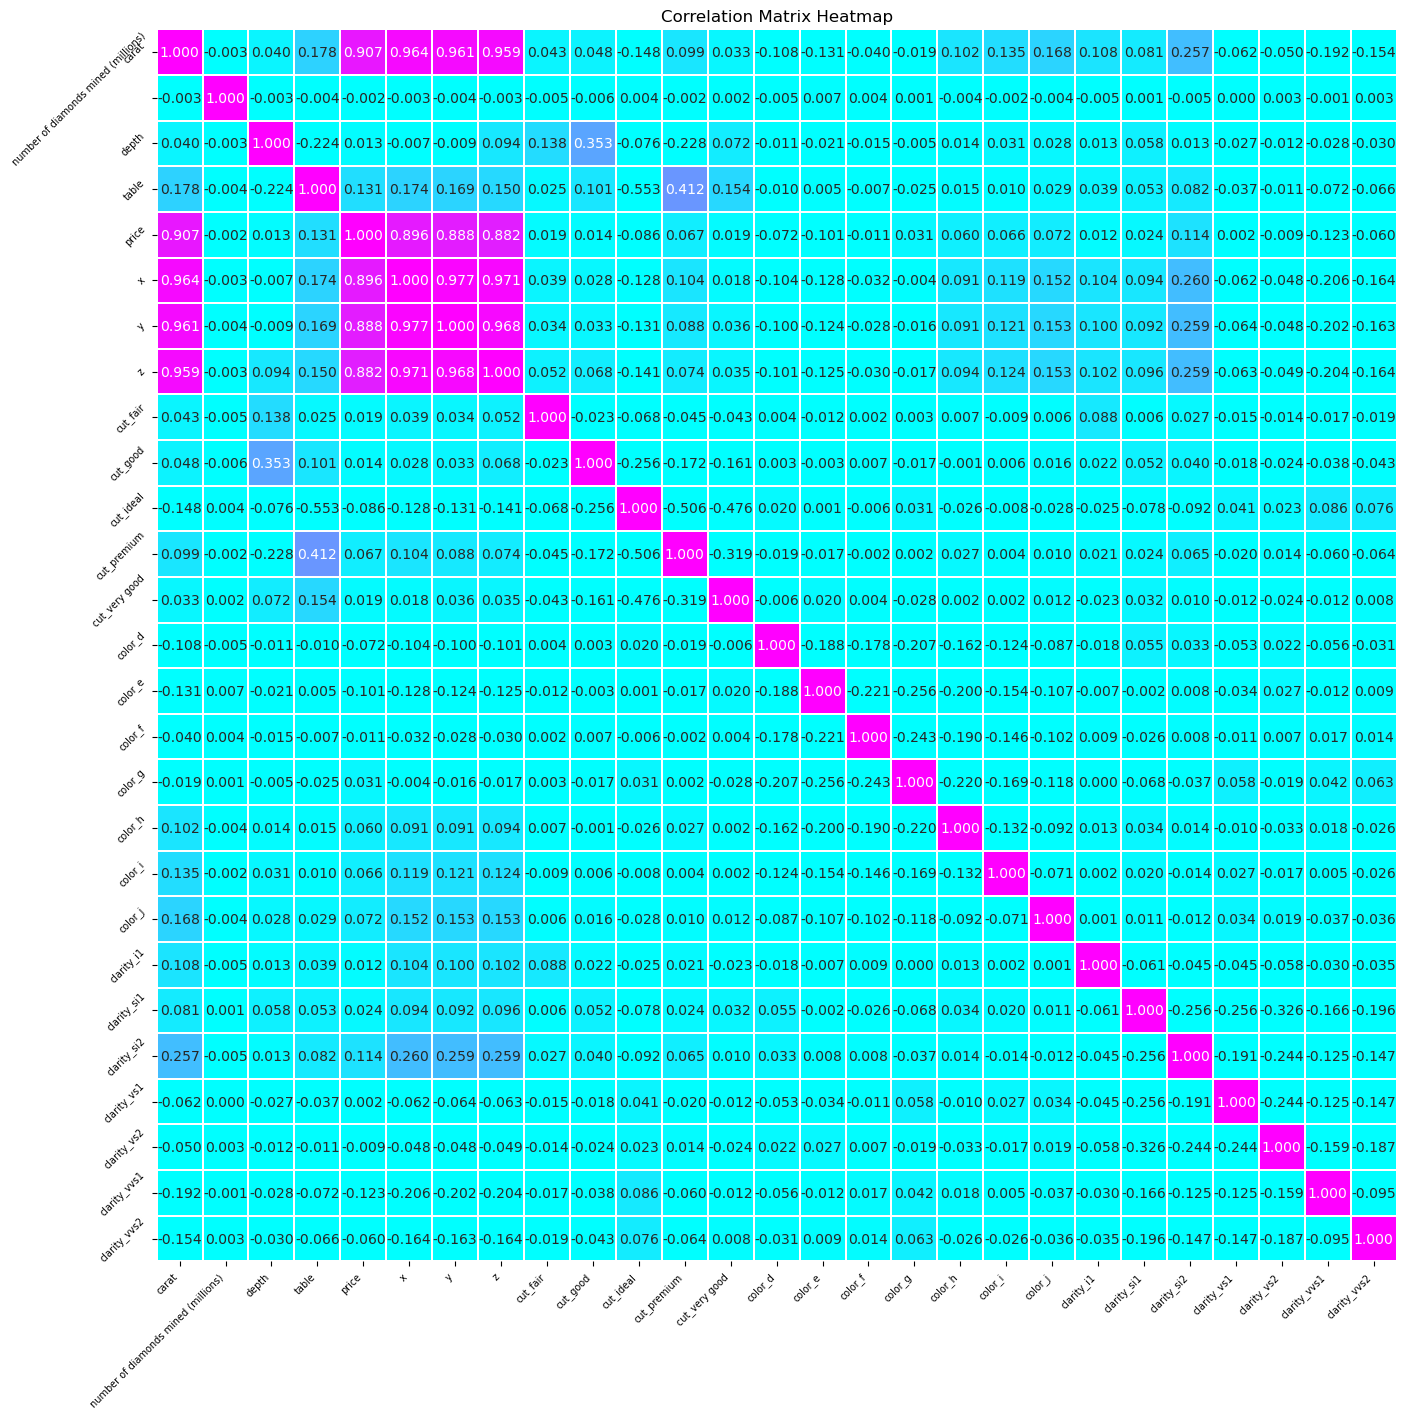

In [192]:
correlation_matrix = df.corr()


plt.figure(figsize=(16, 16))

sns.heatmap(correlation_matrix, annot=True, cmap='cool', vmin=0, vmax=1, linewidths=0.1, fmt='.3f' , cbar=False)    
plt.xticks(rotation=45, ha='right',fontsize=7) 
plt.yticks(rotation=45, ha='right',fontsize=7)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [193]:
# removed un-related columns
df = df.drop(columns=['number of diamonds mined (millions)','cut_very good','color_g','depth','cut_fair','clarity_vs2','clarity_vs1','cut_good','clarity_si1','color_f'],axis=1)

In [194]:
df.to_csv('diamond_preprocessed.csv', index=False)

### Linear Regression using OLS

In [195]:
df = pd.read_csv('diamond_preprocessed.csv')

In [196]:
df.describe()

carat         table         price             x             y  \
count  42190.000000  42190.000000  42190.000000  42190.000000  42190.000000   
mean       0.699048     57.256777   3007.790400      5.542272      5.532940   
std        0.357532      1.993270   2522.595298      0.946838      0.953289   
min        0.200000     52.000000    326.000000      3.730000      3.680000   
25%        0.380000     56.000000    882.000000      4.670000      4.650000   
50%        0.610000     57.000000   2121.000000      5.590000      5.450000   
75%        1.010000     59.000000   4493.000000      6.380000      6.390000   
max        2.000000     63.500000  10702.000000      8.580000      8.500000   

                  z     cut_ideal   cut_premium       color_d       color_e  \
count  42190.000000  42190.000000  42190.000000  42190.000000  42190.000000   
mean       3.416351      0.430434      0.252975      0.131548      0.188433   
std        0.592709      0.495143      0.434722      0.338002      0.391062   
min        1.410000      0.000000      0.000000      0.000000      0.000000   
25%        2.850000      0.000000      0.000000      0.000000      0.000000   
50%        3.360000      0.000000      0.000000      0.000000      0.000000   
75%        3.960000      1.000000      1.000000      0.000000      0.000000   
max        5.490000      1.000000      1.000000      1.000000      1.000000   

            color_h       color_i       color_j    clarity_i1   clarity_si2  \
count  42190.000000  42190.000000  42190.000000  42190.000000  42190.000000   
mean       0.146954      0.092368      0.047191      0.010619      0.160749   
std        0.354065      0.289548      0.212050      0.102499      0.367304   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       clarity_vvs1  clarity_vvs2  
count  42190.000000  42190.000000  
mean       0.075018      0.100901  
std        0.263423      0.301201  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000

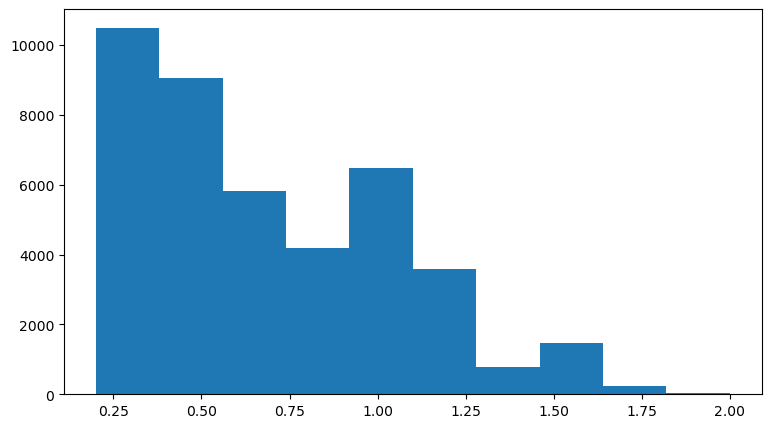

In [197]:
plt.figure(figsize=(9,5))
plt.hist(df["carat"])
plt.show()

In [198]:
df.shape

(42190, 17)

In [199]:

X = df.drop(columns=["carat"])
Y = df["carat"]
splitRatio = int(len(X)*0.8)
X_train ,X_test= X[:splitRatio] , X[splitRatio:]
y_train , y_test = Y[:splitRatio], Y[splitRatio:]

In [200]:
print(f"Shape of the dataset after splitting: \nX-Train: {X_train.shape} \nX-Test: {X_test.shape} \nY-Train: {y_train.shape} \nY-Test: {y_test.shape}")

Shape of the dataset after splitting: 
X-Train: (33752, 16) 
X-Test: (8438, 16) 
Y-Train: (33752,) 
Y-Test: (8438,)


In [201]:
class LinearRegression():
    def MSE(self,y_actuals,y_pred):
        return np.mean((y_actuals-y_pred)**2)
    def predict(self,w,X):
        return np.dot(X,w)
    def OLS(self):
        pass
    def calculateWeight(self,X,y):
        XTX = np.dot(X.T,X)
        XTX_INV = np.linalg.inv(XTX)
        w = np.dot(np.dot(XTX_INV,X.T),y)
        return w


In [202]:
model = LinearRegression()
weights = model.calculateWeight(X_train,y_train)
y_pred = model.predict(weights,X_test)
mse = model.MSE(y_test,y_pred)
print(f"Mean squared error: {mse:0.7f}")

Mean squared error: 0.0037062


In [203]:
plt.scatter(y_test, y_pred, color='blue',label='Predicted Values values')
plt.scatter(y_test, y_test, color='red', label='Actual values', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear: Predictions vs Actual Values')
plt.legend()
plt.show()

### Ridge Regression using OLS

In [204]:
df = pd.read_csv('diamond_preprocessed.csv')

X = df.drop(columns=["carat"])
Y = df["carat"]
splitRatio = int(len(X)*0.8)
X_train ,X_test= X[:splitRatio] , X[splitRatio:]
y_train , y_test = Y[:splitRatio], Y[splitRatio:]

In [205]:
class RidgeRegression():
    def __init__(self,lambd) -> None:
        self.lambd = lambd
    def fit(self,X, y):
        XTX = np.dot(X.T,X)
        identity_matrix = np.eye(X.shape[1])
        INV = np.linalg.inv(XTX + self.lambd * identity_matrix)
        DOT =  np.dot(INV, X.T)
        final = np.dot(DOT,y)
        return final
    def Predict(self,w,X):
        return np.dot(X,w)
    def MSE(self,y_actuals,y_pred):
        return np.mean((y_actuals-y_pred)**2)

In [206]:
model = RidgeRegression(lambd=0.1)
w = model.fit(X_train, y_train)
y_pred = model.Predict(w,X_test)


mse = model.MSE(y_test, y_pred)
print(f"Ridge Regression MSE: {mse:0.7f}")


Ridge Regression MSE: 0.0037061


In [207]:
plt.scatter(y_test, y_pred, color='green', label='Ridge Predictions')
plt.scatter(y_test, y_test, color='red', label='Actual values', linewidth=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge: Predictions vs Actual Values')
plt.legend()
plt.show()

In [208]:
def objective(trial):
    lambda_value = trial.suggest_loguniform('alpha', 0.00001, 100) 
    model = RidgeRegression(lambda_value)
    w = model.fit(X_train, y_train)
    y_pred = model.Predict(w,X_test)
    mse = model.MSE(y_test, y_pred)
    return mse

In [209]:
optuna.logging.disable_default_handler()
study = optuna.create_study(direction='minimize')

study.optimize(objective, n_trials=100)

print("Best hyperparameters: ", study.best_params)
print("Best mean squared error: ", study.best_value)


Best hyperparameters:  {'alpha': 99.78945835848235}
Best mean squared error:  0.003666668702369938


In [214]:
model = RidgeRegression(lambd=study.best_params['alpha'])
model.fit(X_train, y_train)
with open('Nikhil_Gishnu_assignment1_part3.pickle', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!
